# Import Data

In [98]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import numpy as np 


account = pd.read_csv("data/account.csv", sep=";")
card = pd.read_csv("data/card_dev.csv", sep=";")
client = pd.read_csv("data/client.csv", sep=";")
disposition = pd.read_csv("data/disp.csv", sep=";")
demograph = pd.read_csv("data/district.csv",sep=";")
loan = pd.read_csv("data/loan_dev.csv", sep=";")
transactions = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)
merged_data = pd.read_csv("refined/final_data.csv", sep=";")

print(merged_data.shape)

(30373, 29)


# Split Data

In [99]:
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Sampling

In [100]:
def smote_sampling(X_train, y_train):
    sm = SMOTE(random_state=42)
    return sm.fit_resample(X_train, y_train)

# Fit and Predict

In [101]:
def fit_and_predict(model, X_train, y_train, X_test):
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    return prediction

# Calculate Statistics

In [102]:
def calculate_statistics(y_test, pred):
    accuracy = metrics.accuracy_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    f1_score1 = metrics.f1_score(y_test, pred)
    
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score1}")

# Confusion Matrix

In [103]:
def display_conf_matrix_graph(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Not Paid", "Paid"])
    cm_display.plot()

# Aplication of a models

## Decision Tree

### Features : amount, duration and payments


Accuracy: 0.7070707070707071
Precision: 0.9027777777777778
Recall: 0.7471264367816092
F1-Score: 0.8176100628930817


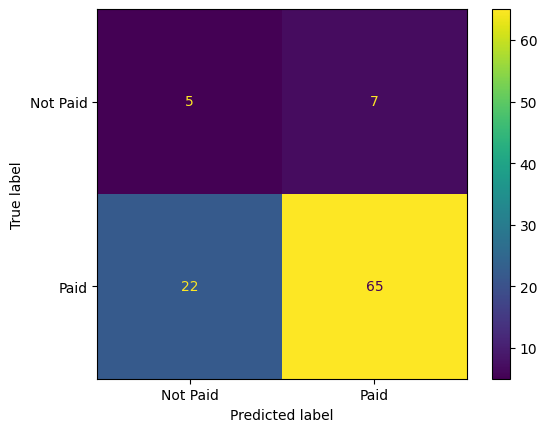

In [104]:

features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

#### Merged Data

In [105]:

# exclude non-numeric columns
merged_data = merged_data.select_dtypes(exclude=['object'])
get_collumns_names = list(merged_data)
# drop loan_status 
for index in range(len(get_collumns_names)):
    if(get_collumns_names[index] == 'loan_status'):
        del get_collumns_names[index]
        break
print(get_collumns_names)
merged_data
save_loan_status = merged_data['loan_status']

['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']
Accuracy: 0.676251097453907
Precision: 0.9308610936517914
Recall: 0.7023950675835903
F1-Score: 0.8006487363157183


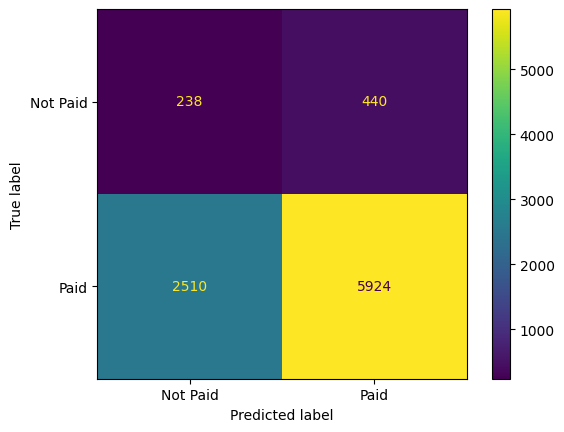

In [106]:

y = merged_data["loan_status"]
# drop loan_status from features ( obviously )
merged_data.drop(columns=["loan_status"], axis=1, inplace=True)

features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need to separate date birth day in 3 columns: day, month and year. 
We need to transform the categorical data in numerical data ( all ?!?)
Do this on data preparation and use refined data on data understanding.
The merged data, need to be sorted by date of loan ascending order. ( See this )

### Features : ft_feature_matrix_enc_md_2 from preparation phase

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
323    1.0
324    0.0
325    1.0
326    1.0
327    1.0
Name: loan_status, Length: 328, dtype: float64
     loan_amount  loan_duration  loan_payments  loan_year  \
0       0.171345           0.00       0.823266        0.0   
1       0.301732           0.50       0.457951        0.0   
2       0.228857           1.00       0.191996        0.0   
3       0.188979           0.50       0.279616        0.0   
4       0.505623           1.00       0.454642        0.0   
..           ...            ...            ...        ...   
323     0.282344           0.75       0.311953        1.0   
324     0.407108           1.00       0.361153        1.0   
325     0.075056           0.75       0.066062        1.0   
326     0.207737           0.50       0.309285        1.0   
327     0.233221           0.25       0.541409        1.0   

     account.account_frequency  account.account_year  account.COUNT(disp)  \
0                     

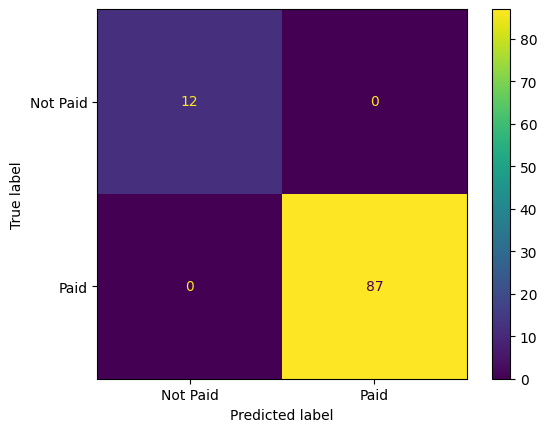

In [127]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna(axis="columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()
print(y)
X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier( max_depth=4000, random_state=42, criterion="entropy", max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Logistic Regression

### Features : amount, duration and payments

Accuracy: 0.494949494949495
Precision: 0.8627450980392157
Recall: 0.5057471264367817
F1-Score: 0.6376811594202899


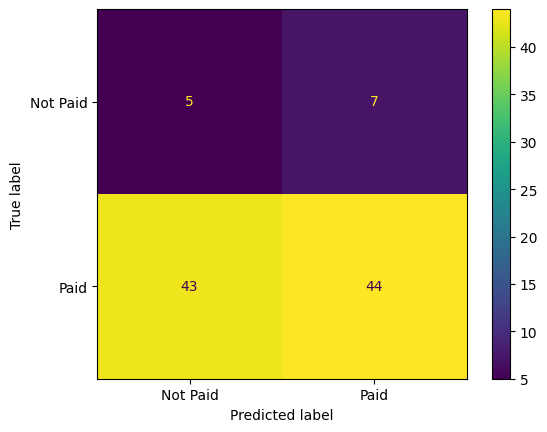

In [108]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

logistic_regression = LogisticRegression()
prediction = fit_and_predict(logistic_regression, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

In [109]:

y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


ValueError: Found input variables with inconsistent numbers of samples: [9112, 99]

### Features : ft_feature_matrix_enc_md_2 from preparation phase

/tmp/ipykernel_395924/1164205892.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


     loan_amount  loan_duration  loan_payments  loan_year  \
0       0.171345           0.00       0.823266        0.0   
1       0.301732           0.50       0.457951        0.0   
2       0.228857           1.00       0.191996        0.0   
3       0.188979           0.50       0.279616        0.0   
4       0.505623           1.00       0.454642        0.0   
..           ...            ...            ...        ...   
323     0.282344           0.75       0.311953        1.0   
324     0.407108           1.00       0.361153        1.0   
325     0.075056           0.75       0.066062        1.0   
326     0.207737           0.50       0.309285        1.0   
327     0.233221           0.25       0.541409        1.0   

     account.account_frequency  account.account_year  account.COUNT(disp)  \
0                          1.0              0.000000                  0.0   
1                          0.5              0.000000                  0.0   
2                          0.5      

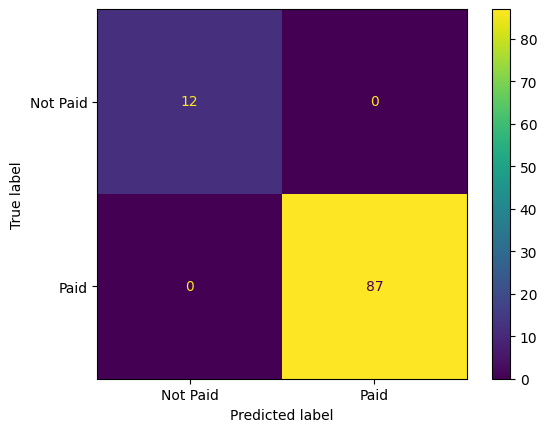

In [ ]:
from sklearn.model_selection import train_test_split

ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = LogisticRegression()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Linear

### Features : amount, duration and payments

Accuracy: 0.41414141414141414
Precision: 0.8717948717948718
Recall: 0.39080459770114945
F1-Score: 0.5396825396825398


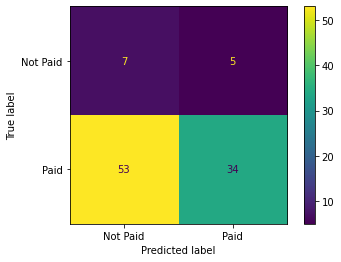

In [ ]:
from sklearn import svm
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for C and gamma
svm_linear = svm.SVC(kernel='linear')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : ft_feature_matrix_enc_md_2 from preparation phase

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/feature_matrix_enc_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="all")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

svm_linear = svm.SVC(kernel='linear')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

/tmp/ipykernel_371223/1242646623.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="all")


     loan_amount  loan_duration  loan_payments  loan_year  \
0          96396             12           8033       1993   
1         165960             36           4610       1993   
2         127080             60           2118       1993   
3         105804             36           2939       1993   
4         274740             60           4579       1993   
..           ...            ...            ...        ...   
323       155616             48           3242       1996   
324       222180             60           3703       1996   
325        45024             48            938       1996   
326       115812             36           3217       1996   
327       129408             24           5392       1996   

     account.account_frequency  account.account_year  account.COUNT(disp)  \
0                            2                  1993                    1   
1                            1                  1993                    1   
2                            1      

: 

A good idea is to tunne C, Gamma and Kernel parameters ( and others) depending on the data and the chosen SVM model.

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM linear parameters
svm_linear = svm.SVC(kernel="linear")
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Non Linear

### Features : amount, duration and payments

In [ ]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
# Use numpy matrix to improve performance
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

What is happening with the data? Why the model is not working?

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need parameters tuning and better feature selection, data preparation and or data understanding.
Check on all models what is the positive and negative class and the confusion matrix not random ! Data sorted by date of loan ascending order. ( See this )
Experimentar várias estratégias de sampling, como por exemplo, undersampling, oversampling, SMOTE, etc.
Validatin after test, not before. ( See this ) ?!!?
Featuring enginnering, feature selection !!!! ( See this )
Descriptive modeling : clustering, PCA, etc. ( See this )
No fundo: passar por todos os passos das teóricas de data mining, e ver o que se pode fazer para melhorar os resultados. ( See this )
Tests with different models, and different parameters. ( See this )
Tests need to be about loans in the future comparing with the data training !!!!
New feature: loan amount / duration
New feature: loan amount / payments
New feature: loan amount / payments / duration
New feature: number of clients with the same account with loan
New feature: try to calculate "taxa de esforço" ou algo parecido
New feature : get month balance, calculate the average and compare with the loan month payment -> sum the value of the loan payment
Maybe delete the type of transaction !!!
-> See the formulas used by banks !!!
See account_frequency: meaning and maybe changing to numerical values

In [ ]:
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)
model= KNeighborsClassifier(n_neighbors=1)
prediction = fit_and_predict(model, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

/tmp/ipykernel_395924/3601622644.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


     loan_amount  loan_duration  loan_payments  loan_year  \
0      -0.141304           -1.0       1.173919       -1.0   
1       0.392686            0.0       0.206697       -1.0   
2       0.094234            1.0      -0.497457       -1.0   
3      -0.069086            0.0      -0.265470       -1.0   
4       1.227708            1.0       0.197937       -1.0   
..           ...            ...            ...        ...   
323     0.313283            0.5      -0.179853        0.5   
324     0.824245            1.0      -0.049590        0.5   
325    -0.535648            0.5      -0.830884        0.5   
326     0.007738            0.0      -0.186917        0.5   
327     0.112104           -0.5       0.427663        0.5   

     account.account_frequency  account.account_year  account_id = 11362  \
0                          1.0                  -0.5                 0.0   
1                          0.0                  -0.5                 0.0   
2                          0.0         

ValueError: pos_label=1 is not a valid label. It should be one of [-1.0, 0.0]